# FISSpy

Next, import some reuired packages.

#### FISSpy is a data analysis tool for the [NST/FISS instrument](http://fiss.snu.ac.kr) based on Python.


website: http://fiss.snu.ac.kr

code : https://github.com/SNU-sunday/FISS-PYTHON

Email : jhkang@astro.snu.ac.kr

### Requirements
* [NumPy](http://numpy.scipy.org/)
* [Scipy](http://www.scipy.org/)
* [Matplotlib](http://matplotlib.sourceforge.net/)
* [Astropy](http://astropy.org)
* [Interpolation](https://github.com/EconForge/interpolation.py)

# Setting

At first, we set up the notebook for inline plots.

In [1]:
%matplotlib inline

In [2]:
import glob

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

# Header

In [5]:
import fisspy

In [6]:
file=glob.glob('*_c.fts')

In [7]:
header=fisspy.read.getheader(file[0])

In [8]:
header.keys()

dict_keys(['STEPTIME=', 'CCD_XPIX=', 'OBSERVER=', 'WAVELEN', 'CCDTEMP', 'CCDNAME', 'ENDTIME', 'HISTORY', 'FISSMODE=', 'ELAPTIME=', 'TEL_XPOS=', 'CDELT1', 'TEL_YPOS=', 'STEPSIZE=', 'BITPIX', 'DATE', 'HISTROY', 'EXPTIME', 'GAIN', 'CRPIX1', 'NAXIS1', 'CRVAL1', 'NAXIS3', 'NAXIS', 'TARGET', 'SIMPLE', 'NAXIS2', 'CCD_YPIX=', 'STRTIME'])

In [9]:
print(header['NAXIS1'],header['NAXIS2'],header['NAXIS3'])

512.0 256.0 130.0


In [10]:
header

{'BITPIX': 16.0,
 'CCDNAME': "'DV897_BV'",
 'CCDTEMP': -27.0,
 'CCD_XPIX=': '/',
 'CCD_YPIX=': '/',
 'CDELT1': 0.0191817938094,
 'CRPIX1': 259.848724365,
 'CRVAL1': 6562.817,
 'DATE': "'2014-06-03T16:48:41'",
 'ELAPTIME=': '/',
 'ENDTIME': "'2014.06.03-16:48:41'",
 'EXPTIME': 0.03,
 'FISSMODE=': '/',
 'GAIN': 0.0,
 'HISTORY': 'degree',
 'HISTROY': "'processed",
 'NAXIS': 3.0,
 'NAXIS1': 512.0,
 'NAXIS2': 256.0,
 'NAXIS3': 130.0,
 'OBSERVER=': "Song'",
 'SIMPLE': 'T',
 'STEPSIZE=': '/',
 'STEPTIME=': '/',
 'STRTIME': "'2014.06.03-16:48:24'",
 'TARGET': "'Sunspot",
 'TEL_XPOS=': '/',
 'TEL_YPOS=': '/',
 'WAVELEN': '6562.8'}

# Read spectrogram

Now, we read the fiss data.

In [11]:
datax=fisspy.read.frame(file[0],70)

In [12]:
datax.shape

(1, 256, 512)

In [13]:
datax=datax.reshape((256,512))

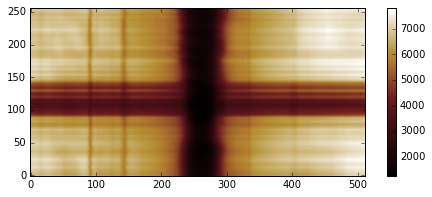

In [14]:
plt.figure(figsize=(8,3))
plt.imshow(datax,cmap=fisspy.cm.ha,origin='lower')
plt.colorbar(ticks=np.arange(1000,8000,1000))

# Read raster image

In [15]:
raster=fisspy.read.raster(file[0],np.array([-5,-0.5,0,0.5]),0.05)

In [16]:
raster.shape

(256, 130, 4)

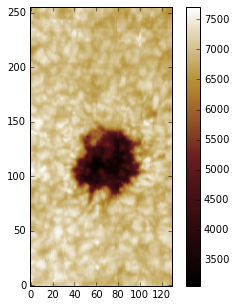

In [17]:
plt.figure(figsize=(5,5))
plt.imshow(raster[:,:,0],cmap=fisspy.cm.ha,origin='lower')
plt.colorbar()

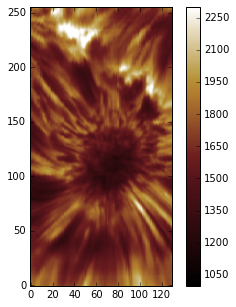

In [18]:
plt.figure(figsize=(5,5))
plt.imshow(raster[:,:,2],cmap=fisspy.cm.ha,origin='lower')
plt.clim([1000,2300])
plt.colorbar()

# Doppler map

In [19]:
import fisspy.doppler

In [20]:
data=fisspy.read.frame(file[0],0,xmax=True)

In [21]:
data.shape

(130, 256, 512)

In [22]:
mdata=data.mean((0,1))

In [23]:
wv=fisspy.doppler.wavecalib('6562',mdata)

In [24]:
s=np.abs(wv)<=1.

In [25]:
wc, intensity=fisspy.doppler.lambdameter(wv[s],data[:,:,s],0.2)

Setting
[33280   104]
(33280, 104)


In [26]:
vel=wc*3e5/6562

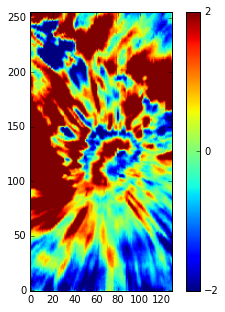

In [27]:
plt.figure(figsize=(5,5))
plt.imshow(vel,origin='lower')
plt.clim([-2,2])
plt.colorbar(ticks=[-2,0,2])